In [1]:
# application for generating image from text

In [2]:
#! pip install --upgrade \
#  diffusers \
#  transformers \
#  safetensors \
#  sentencepiece \
#  accelerate \
#  bitsandbytes \
#  torch \
#  huggingface_hub --quiet
# pip install ipywidgets
# export HF_TOKEN=???

In [3]:
import os
from huggingface_hub import login

login(token=os.environ.get("HF_TOKEN"))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/shamim/.cache/huggingface/token
Login successful


In [4]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler, AutoencoderKL
import torch

#check the cuda avaibility
#torch.cuda.is_available()

model_id = 'prompthero/openjourney-v4'

pipe = DiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float32
)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float32)

model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.53k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
# Image generation input params
import random

prompt = 'Istanbul street, bosforas, old city, summer, sunny, hyper-detailed, comprehensive cinematic, Atmosphere, Masterpiece, hyperdetailed 8k '
negative_prompt = 'blur haze, pencils, pens, fingers'

num_steps = 20
# variation number 
num_variations = 1
prompt_guidance = 9
dimensions = (400, 600)
random_seeds = [random.randint(0, 65000) for _ in range(num_variations)]

In [6]:
images = pipe(prompt= num_variations * [prompt],
              num_inference_steps=num_steps,
              guidance_scale=prompt_guidance,
              height = dimensions[0],
              width = dimensions[1],
              Negative_Prompt = negative_prompt,
              num_outputs = 1,
              generator = [torch.Generator().manual_seed(i) for i in random_seeds]
             ).images
print ('Images: ', len(images) )

  0%|          | 0/20 [00:00<?, ?it/s]

Images:  1


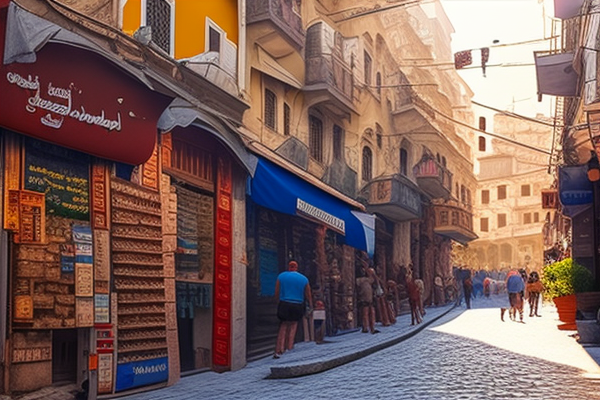

In [7]:
images[0]

In [ ]:
#images[2]

In [ ]:
#images[3]